<a href="https://colab.research.google.com/github/bbalbo/Various/blob/main/breast_cancer_plot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [63]:
X=pd.DataFrame(load_breast_cancer().data)
y=load_breast_cancer().target

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

(143,)

In [65]:
import seaborn as sns

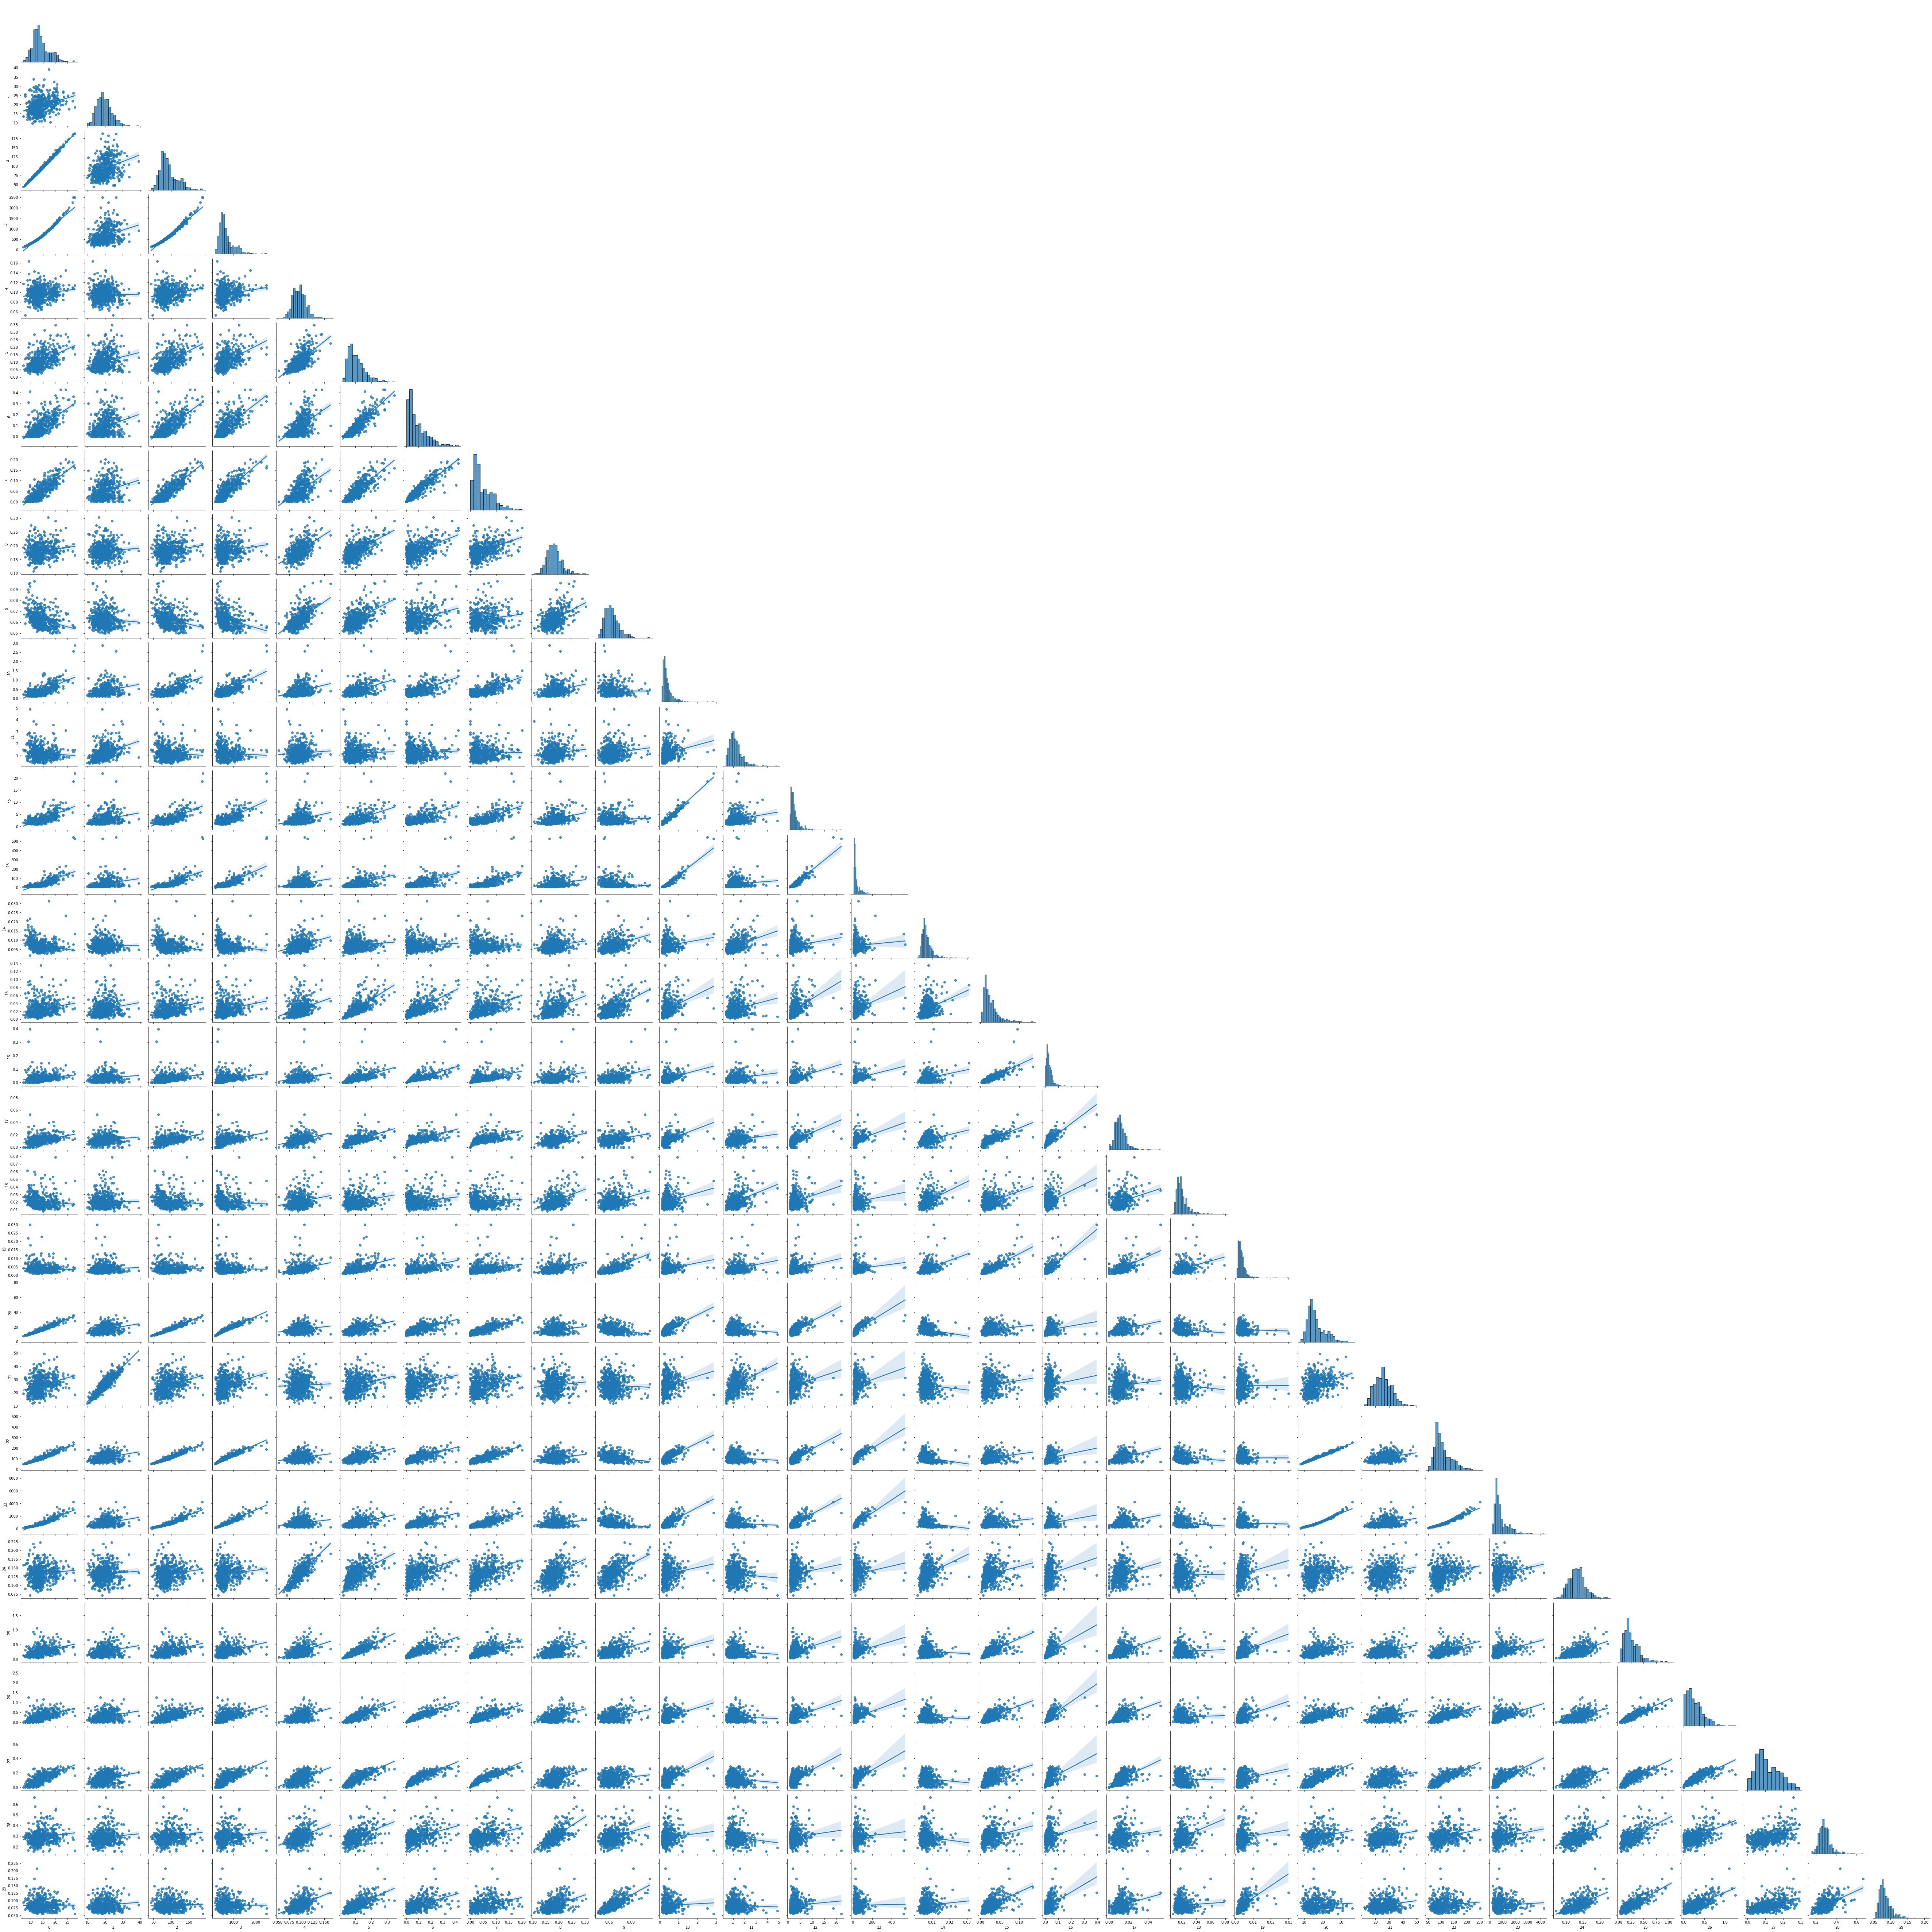

In [66]:
sns.pairplot(data=X, kind='reg',corner=True)

In [67]:
#Preprocessing 

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled_train=pd.DataFrame(scaler.fit_transform(X_train))
X_scaled_test=pd.DataFrame(scaler.transform(X_test))
X_scaled_train


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.349138,-1.438513,-0.411726,-0.390479,-1.863662,-1.268607,-0.826171,-0.952866,-1.729368,-0.941541,...,-0.542685,-1.655655,-0.589864,-0.525560,-1.510669,-0.891500,-0.750217,-0.916711,-0.925086,-0.808411
1,-0.204687,0.312640,-0.133673,-0.275880,1.078073,0.863546,0.726314,0.898441,1.178770,1.474377,...,0.041487,0.689899,0.194128,-0.051934,1.129415,0.923942,1.222217,1.436560,1.149559,1.569111
2,-0.329312,-0.215072,-0.317394,-0.364357,-1.579880,-0.457451,-0.597310,-0.764588,0.275343,-0.501024,...,-0.435901,-0.148985,-0.320159,-0.446032,-1.634396,-0.106752,-0.539891,-0.723713,0.534970,-0.619348
3,1.027403,2.089824,1.046922,0.917584,0.316303,0.562037,1.048527,0.930437,-0.325697,-0.477474,...,1.113515,2.165006,1.165793,0.997696,0.383604,0.860948,1.872819,1.310691,0.152884,0.421636
4,1.828969,0.696001,1.763681,1.783821,-0.333674,0.628175,0.974660,1.265740,-0.131572,-1.713139,...,1.471556,0.387568,1.556276,1.385595,-0.577759,0.296680,0.595768,1.232995,0.050452,-1.406351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-1.482661,-1.078817,-1.363286,-1.154195,0.162946,0.984150,-0.017962,-0.503063,0.379872,3.767006,...,-1.356547,-1.634059,-1.341770,-1.043821,-0.452739,-0.027674,-0.625430,-1.006838,-1.014510,1.426745
422,-0.703187,-0.205607,-0.688544,-0.680910,1.336057,-0.015692,-0.213582,-0.340964,0.002822,0.359231,...,-0.643188,0.623452,-0.647074,-0.623509,1.620874,0.122440,0.098634,0.142137,-0.117015,0.434165
423,0.047396,-0.562937,-0.065292,-0.062691,-2.240606,-1.473633,-1.021664,-1.097247,-1.090996,-1.225522,...,-0.272584,-0.806803,-0.376764,-0.334976,-1.962898,-1.322676,-1.152453,-1.232624,-0.682827,-1.261137
424,-0.040408,0.099662,-0.031514,-0.155663,0.748426,0.209953,0.320044,0.446522,-0.489956,0.392478,...,0.173397,0.879270,0.212290,-0.007830,1.297546,0.730938,0.700428,1.088480,0.489445,1.261600


In [116]:
# Check that mean and standard deviation of the scaled data are normalized.
X_scaled_train.describe().round().loc[['mean','std']].style

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
mean,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
#Principal Components Analysis (PCA)

In [118]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [119]:
# Instantiate & fit data using PCA
pca = PCA()
pca_train=pca.fit_transform(X_scaled_train)
pca_test=pca.transform(X_scaled_test)

In [120]:
pca_train.shape

(426, 30)

In [121]:
pca_test.shape

(143, 30)

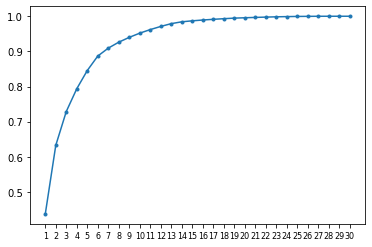

In [122]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
import matplotlib.pyplot as plt
plt.plot(range(1, 31), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,31), fontsize=8);

Text(0, 0.5, 'Proportion of Explained Variance')

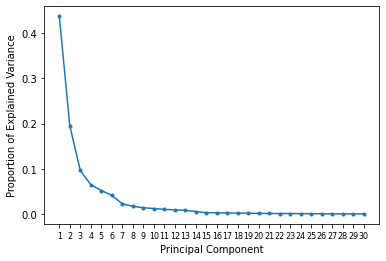

In [123]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 31), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 31), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [124]:
# PCA 
pca_train

array([[-4.30770177e+00, -1.87876301e+00, -9.63362981e-02, ...,
         1.25365849e-02,  1.71293388e-02,  2.84540361e-03],
       [ 2.37019450e+00,  2.00323118e+00, -2.41257605e+00, ...,
        -3.71737930e-02,  2.40654157e-02,  3.53777930e-03],
       [-1.92867443e+00, -2.29950203e-01,  6.99842755e-01, ...,
        -8.94755369e-03, -3.25798169e-03, -1.06138111e-02],
       ...,
       [-4.49788441e+00, -3.07995377e+00, -5.84939205e-02, ...,
         1.38563576e-02,  4.33820436e-03,  1.39044856e-02],
       [ 7.77088993e-01,  5.39144742e-01, -2.77792141e+00, ...,
        -2.76351100e-02, -2.09607478e-02,  4.21914127e-03],
       [-3.37081968e+00, -1.33023097e+00, -1.02245303e-01, ...,
        -3.52490937e-03,  1.30103137e-02, -2.96216057e-04]])

In [125]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_iterators=100)

In [126]:
xgb.fit(pca_train, y_train)

[23:52:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_iterators=100)

In [127]:
xgb.score(pca_train, y_train)

0.9855381811767858

In [128]:
xgb.score(pca_test, y_test)

0.8666621336236717

In [129]:
# PCA with 85% explained variance
pca85 = PCA(n_components=.85)
pca85

PCA(n_components=0.85)